<a href="https://colab.research.google.com/github/shimamz71/9-TYPE-OF-CNN/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#LOADING the requiered libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [4]:
#Generating simple dataset
N = 1000
TP = 800

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df=pd.DataFrame(x)
df.head()

,0
0,0.694813
1,0.413125
2,1.924121
3,1.929887
4,1.350401


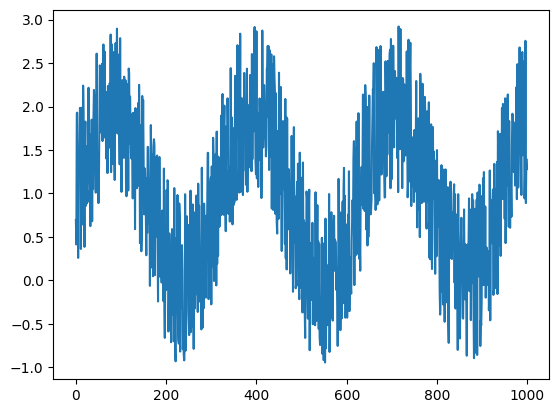

In [5]:
#plot
plt.plot(df)
plt.show()

In [6]:
#split df dataset into train and test part
values=df.values
train,test=values[0:TP,:],values[TP:N,:]

In [7]:
step=4
#add step element into train and test
test=np.append(test,np.repeat(train[-1,],step))
train=np.append(train,np.repeat(train[-1,],step))

In [8]:
#convert into dataset matrix
def convertToMatrix(data,step):
  X,Y=[], []
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX,trainY=convertToMatrix(train,step)
testX,testY=convertToMatrix(test,step)

In [9]:
#reshape trainX , testX to fit with the keras model requiers 3 dimentional input data
trainX=np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX=np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape
testX.shape

(1, 1, 4)

In [10]:
#building a model with simple RNN
model=Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1184      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1457 (5.69 KB)
Trainable params: 1457 (5.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
#predicting and plotting the result
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)


Epoch 1/100
1/1 - 2s - loss: 0.3762 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 0.2216 - 11ms/epoch - 11ms/step
Epoch 3/100
1/1 - 0s - loss: 0.1466 - 14ms/epoch - 14ms/step
Epoch 4/100
1/1 - 0s - loss: 0.1007 - 9ms/epoch - 9ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0702 - 11ms/epoch - 11ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0490 - 10ms/epoch - 10ms/step
Epoch 7/100
1/1 - 0s - loss: 0.0341 - 10ms/epoch - 10ms/step
Epoch 8/100
1/1 - 0s - loss: 0.0235 - 11ms/epoch - 11ms/step
Epoch 9/100
1/1 - 0s - loss: 0.0160 - 8ms/epoch - 8ms/step
Epoch 10/100
1/1 - 0s - loss: 0.0107 - 9ms/epoch - 9ms/step
Epoch 11/100
1/1 - 0s - loss: 0.0071 - 11ms/epoch - 11ms/step
Epoch 12/100
1/1 - 0s - loss: 0.0046 - 10ms/epoch - 10ms/step
Epoch 13/100
1/1 - 0s - loss: 0.0029 - 9ms/epoch - 9ms/step
Epoch 14/100
1/1 - 0s - loss: 0.0018 - 8ms/epoch - 8ms/step
Epoch 15/100
1/1 - 0s - loss: 0.0011 - 10ms/epoch - 10ms/step
Epoch 16/100
1/1 - 0s - loss: 6.0715e-04 - 9ms/epoch - 9ms/step
Epoch 17/100
1/1 - 0s - loss:

In [13]:
#check the loss
trainScore=model.evaluate(trainX, trainY,verbose=0)
print(trainScore)

0.0
